Atalov S.

Fundamentals of Machine Learning and Artificial Intelligence

---

## Lab 5: Predicting Customer Churn in Banking

<div>
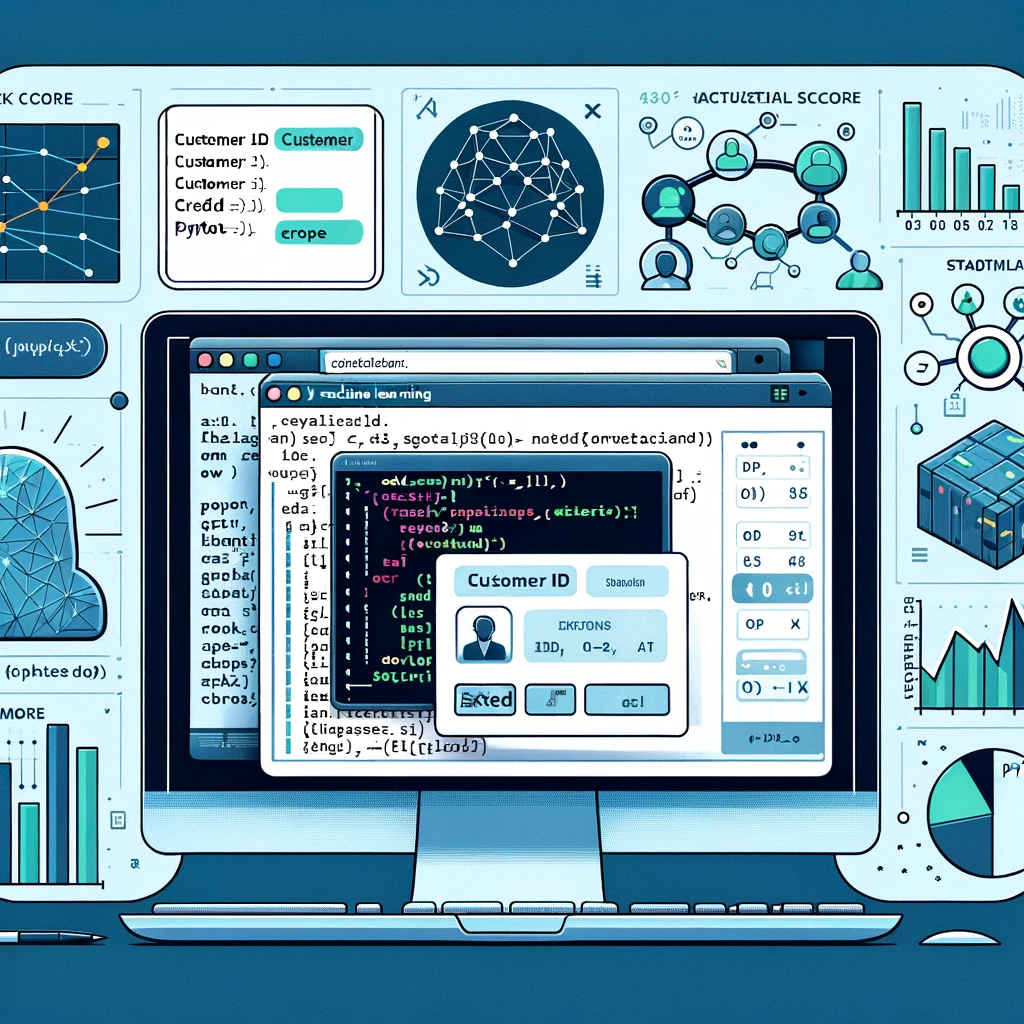
</div>




### Objective
Develop a machine learning model to predict whether a bank customer will churn based on their profile and banking activity.

### Dataset Description
The dataset contains details of bank customers along with whether they have churned. Each record includes the following attributes:

- **Customer ID**: A unique identifier for each customer.
- **Surname**: The customer's surname.
- **Credit Score**: A numerical value representing the customer's creditworthiness.
- **Geography**: The customer's country (France, Spain, or Germany).
- **Gender**: The customer's gender (Male or Female).
- **Age**: The customer's age.
- **Tenure**: How long the customer has been with the bank (in years).
- **Balance**: The amount of money available in the customer's bank account.
- **NumOfProducts**: How many banking products the customer uses.
- **HasCrCard**: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- **IsActiveMember**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
- **EstimatedSalary**: The estimated salary of the customer.
- **Exited**: Whether the customer has churned (1 = Yes, 0 = No).

### Tasks

1. **Data Preprocessing**: Clean the data if necessary and perform any required transformations.
2. **Exploratory Data Analysis**: Provide a statistical summary of the variables and visualize the relationships between features.
3. **Feature Engineering**: Generate new features if necessary and select appropriate features for building the model.
4. **Model Building**: Train at least two different classifiers to predict customer churn.
5. **Model Evaluation**: Evaluate your models using accuracy, recall and F1-score.
6. **Model Selection**: Compare the performance of the models and select the best one based on the evaluation metrics.

### Deliverables
Submit a Jupyter Notebook containing all the steps from data preprocessing to model evaluation and selection and **csv** file with predictions on test data. Include comments and explanations of your code and decisions.

---

This exercise encourages hands-on practice with the full data science process from data cleaning to model evaluation, using a real-world dataset.

## 1. **Data Preprocessing**: Clean the data if necessary and perform any required transformations.

In [64]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# processing libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# model libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [68]:
df = pd.read_csv("train.csv")

In [69]:
df.drop(columns=["id", "CustomerId","Surname","CreditScore"], inplace=True)

## 2. **Exploratory Data Analysis**: Provide a statistical summary of the variables and visualize the relationships between features.

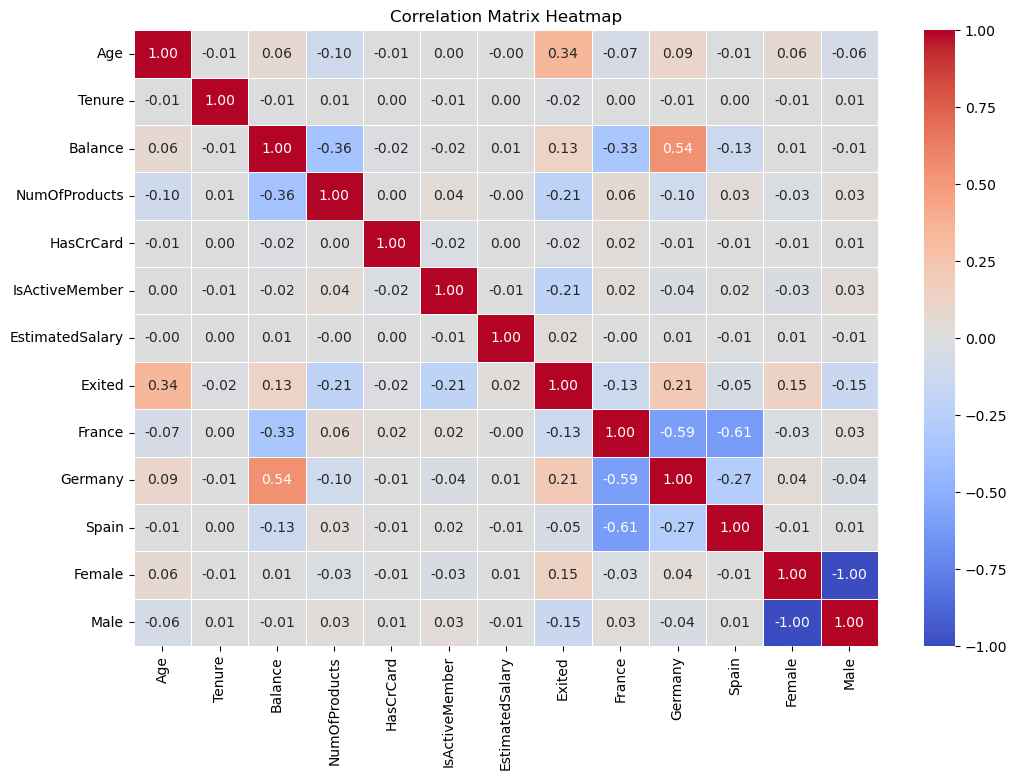

In [73]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title for better understanding
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

## 3. **Feature Engineering**: Generate new features if necessary and select appropriate features for building the model.

In [71]:
geography=pd.get_dummies(df['Geography'])
gender=pd.get_dummies(df['Gender'])
df=pd.concat([df,geography,gender],axis=1)

In [72]:
df.drop(['Geography','Gender'],axis=1,inplace=True)


## 4. **Model Building**: Train at least two different classifiers to predict customer churn.

In [74]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=42, n_estimators=400)
rf = RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)


## 5. **Model Evaluation**: Evaluate your models using accuracy, precision, recall and F1-score.

In [75]:
X = df.copy()
y = X.pop("Exited")
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

In [ ]:
gb.fit(X_train, y_train)
rf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
gpred = gb.predict(X_test)
rpred = rf.predict(X_test)
print(f1_score(gpred, y_test))
print(f1_score(rpred, y_test))
print(precision_score(gpred, y_test))
print(precision_score(rpred, y_test))
print(recall_score(gpred, y_test))
print(recall_score(rpred, y_test))
print(accuracy_score(gpred, y_test))
print(accuracy_score(rpred, y_test))

## 6. **Model Selection**: Compare the performance of the models and select the best one based on the evaluation metrics.

## 7. Making Predictions: Using best model make a predictions on test data.

In [53]:
df1 = pd.read_csv("test.csv")

In [54]:
df1.drop(columns=["id","CustomerId", "CreditScore","Surname"],inplace=True)
geography=pd.get_dummies(df1['Geography'])
gender=pd.get_dummies(df1['Gender'])
df1=pd.concat([df1,geography,gender],axis=1)
df1.drop(['Geography','Gender'],axis=1,inplace=True)


In [59]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,False,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,False,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,False,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,False,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131996,581,33.0,1,77253.22,2,1.0,0.0,194239.63,0,False,False,True,False,True
131997,545,38.0,9,0.00,1,1.0,0.0,97633.93,0,False,False,True,True,False
131998,598,45.0,8,132932.11,1,0.0,1.0,142839.13,1,False,True,False,False,True
131999,833,32.0,2,124545.68,1,1.0,1.0,50267.88,0,True,False,False,False,True


In [58]:
df1

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,41.0,9,181461.48,3,1.0,1.0,187929.43,False,True,False,True,False
1,38.0,1,122214.00,1,1.0,0.0,88965.46,True,False,False,False,True
2,28.0,4,0.00,2,1.0,0.0,180134.88,True,False,False,False,True
3,38.0,1,145843.47,2,1.0,0.0,56794.02,False,True,False,True,False
4,58.0,5,0.00,2,0.0,1.0,102763.69,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
33028,33.0,2,0.00,1,1.0,1.0,131834.75,False,False,True,True,False
33029,35.0,3,0.00,1,0.0,0.0,131834.45,True,False,False,False,True
33030,31.0,5,0.00,1,1.0,1.0,127429.56,True,False,False,False,True
33031,30.0,7,161533.00,1,0.0,1.0,71173.03,False,False,True,True,False


In [57]:
pd.DataFrame(gb.predict(df1)).to_csv("Zhunusov_bank_churn.csv")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- CreditScore


## 8. What is the main reason of customer churn? How to analyze this?

<h1>AGE</h1>

<h1>By the help of correlation</h1>